In [135]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [133]:
class Images():
  def __init__(self, file_paths, new_size = (128,128)):
    assert isinstance(file_paths, list)
    self.file_paths = file_paths
    self.raw = self.read_images()
    self.images = self.resize(self.raw, size=new_size)
    self.avg_colors = self.get_avg_colors(self.raw)
     
    
  def read_images(self):
    images = []
    for file_path in self.file_paths:
      assert (os.path.isfile(file_path)), 'file %s not found'%file_path
      images += [plt.imread(file_path)]
    return images

  def resize(self, images, size):
    resized_images = []
    for img in images:
      current_size = img.shape[:2]

      scale_x = size[0]/current_size[0]
      scale_y = size[1]/current_size[1]
      scale = max(scale_x, scale_y)

      resize_size = (int(current_size[0]*scale),int(current_size[1]*scale))
      resized = cv2.resize(img, resize_size)
      cropped_mid = resized[(resize_size[0]-size[0])//2:(resize_size[0]+size[0])//2, (resize_size[1]-size[1])//2:(resize_size[1]+size[1])//2]
      resized_images += [cropped_mid]
    return resized_images
  
  def get_avg_colors(self, images):
    return [np.mean(img) for img in images]

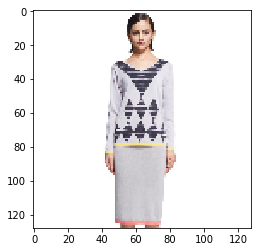

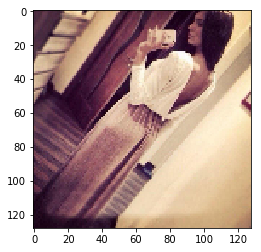

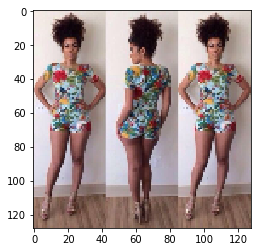

In [134]:
imgs = Images(['D:/02. LSDA/github/01_input_data/train/3.jpg','D:/02. LSDA/github/01_input_data/train/2.jpg','D:/02. LSDA/github/01_input_data/train/1.jpg'])
for img in imgs.images:
  plt.imshow(img)
  plt.figure()